In [2]:
import pandas as pd
import numpy as np
import pickle

df = pd.read_pickle("my_dataset.pkl")

In [3]:
first_df = pd.DataFrame.from_records(list(df.values()))

In [4]:
first_df.head()

,bonus,bonus-to-salary_ratio,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,fraction_mail_from_poi,fraction_mail_to_poi,from_messages,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000.0,1.640294,0.0,0.0,0.0,0.0,94299.0,1.310345,0.001239,29.0,...,0.0,1740.0,False,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
1,1200000.0,4.492666,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.000000,0.000000,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
2,350000.0,2.047490,0.0,-400729.0,0.0,4890344.0,78552.0,0.000000,0.000000,0.0,...,0.0,12961.0,False,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
3,0.0,0.000000,0.0,0.0,0.0,651850.0,0.0,0.833333,0.000000,12.0,...,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
4,1500000.0,6.165405,0.0,-3117011.0,0.0,5538001.0,34039.0,1.000000,0.020096,32.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0


In [5]:
employees = pd.Series(list(df.keys()))
first_df.set_index(employees, inplace=True)
first_df.head()

,bonus,bonus-to-salary_ratio,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,fraction_mail_from_poi,fraction_mail_to_poi,from_messages,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000.0,1.640294,0.0,0.0,0.0,0.0,94299.0,1.310345,0.001239,29.0,...,0.0,1740.0,False,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
BAXTER JOHN C,1200000.0,4.492666,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.000000,0.000000,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
ELLIOTT STEVEN,350000.0,2.047490,0.0,-400729.0,0.0,4890344.0,78552.0,0.000000,0.000000,0.0,...,0.0,12961.0,False,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
CORDES WILLIAM R,0.0,0.000000,0.0,0.0,0.0,651850.0,0.0,0.833333,0.000000,12.0,...,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
HANNON KEVIN P,1500000.0,6.165405,0.0,-3117011.0,0.0,5538001.0,34039.0,1.000000,0.020096,32.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0


In [6]:
first_df.shape

(141, 23)

In [25]:
# first_df.to_csv('enron_dataset.csv')

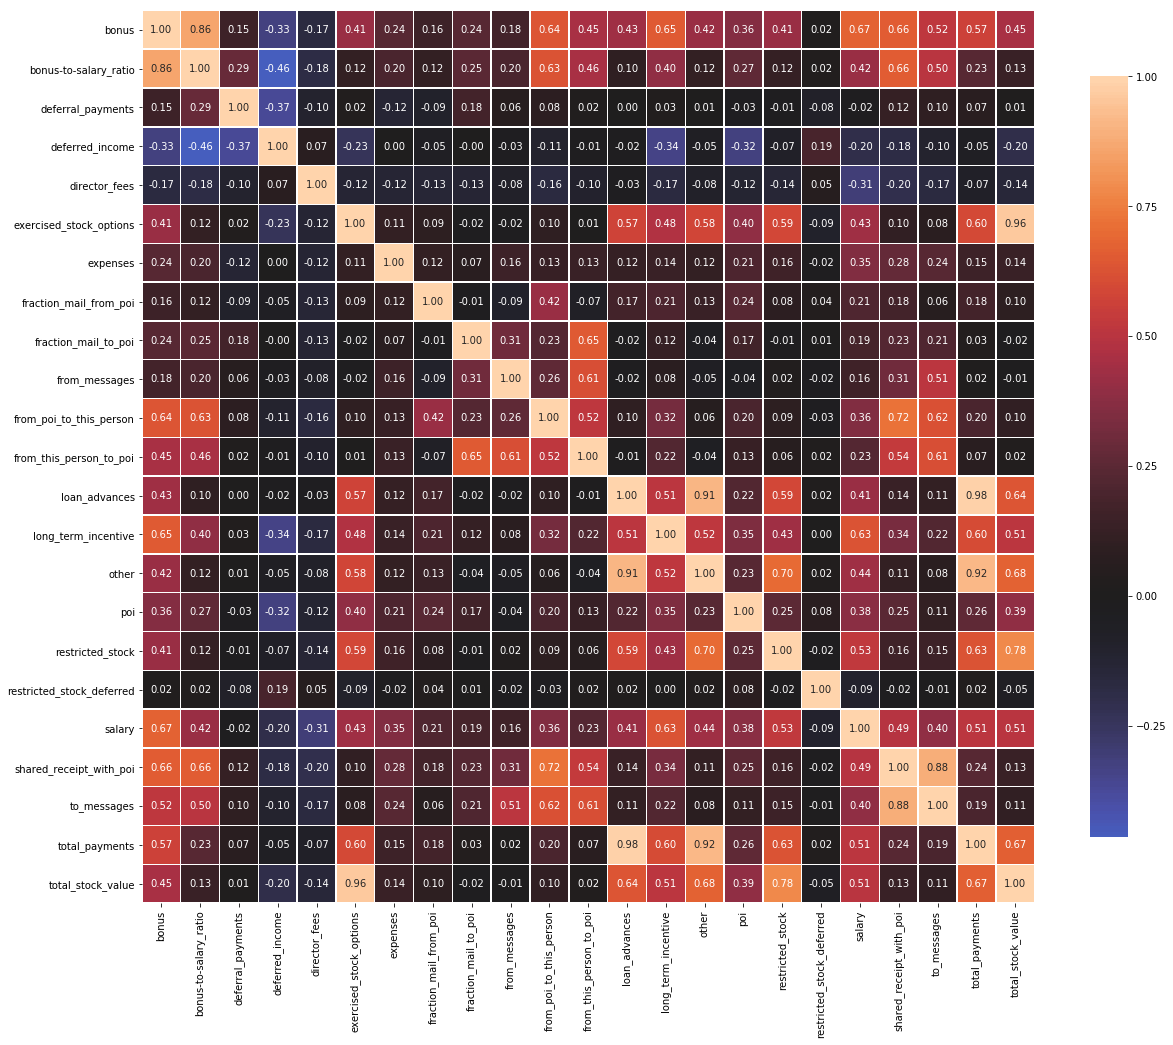

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(first_df):
    correlations = first_df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(first_df)

In [31]:
features_list = first_df[['poi', 'total_stock_value', 'total_payments','shared_receipt_with_poi', 'salary', 'restricted_stock', 'long_term_incentive', 'exercised_stock_options', 'deferred_income', 'bonus-to-salary_ratio', 'bonus']]

features_list = features_list.reset_index()

features_list = features_list.drop('index', axis=1)

features_list.head()


,poi,total_stock_value,total_payments,shared_receipt_with_poi,salary,restricted_stock,long_term_incentive,exercised_stock_options,deferred_income,bonus-to-salary_ratio,bonus
0,False,585062.0,1061827.0,702.0,365788.0,585062.0,0.0,0.0,0.0,1.640294,600000.0
1,False,10623258.0,5634343.0,0.0,267102.0,3942714.0,1586055.0,6680544.0,-1386055.0,4.492666,1200000.0
2,False,6678735.0,211725.0,0.0,170941.0,1788391.0,0.0,4890344.0,-400729.0,2.047490,350000.0
3,False,1038185.0,0.0,58.0,0.0,386335.0,0.0,651850.0,0.0,0.000000,0.0
4,True,6391065.0,288682.0,1035.0,243293.0,853064.0,1617011.0,5538001.0,-3117011.0,6.165405,1500000.0


In [32]:
from sklearn.model_selection import train_test_split

y = features_list['poi']
X = features_list.drop('poi', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [33]:
from tensorflow.keras.utils import to_categorical
 # One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=10))
model.add(Dense(units=2, activation='softmax'))

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 22        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
 # Fit the model to the training data
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 13.9756 - acc: 0.1333
Epoch 2/100
 - 0s - loss: 13.9756 - acc: 0.1333
Epoch 3/100
 - 0s - loss: 13.9756 - acc: 0.1333
Epoch 4/100
 - 0s - loss: 13.9755 - acc: 0.1333
Epoch 5/100
 - 0s - loss: 13.9755 - acc: 0.1333
Epoch 6/100
 - 0s - loss: 13.9755 - acc: 0.1333
Epoch 7/100
 - 0s - loss: 13.9755 - acc: 0.1333
Epoch 8/100
 - 0s - loss: 13.9755 - acc: 0.1333
Epoch 9/100
 - 0s - loss: 13.9755 - acc: 0.1333
Epoch 10/100
 - 0s - loss: 13.9754 - acc: 0.1333
Epoch 11/100
 - 0s - loss: 13.9754 - acc: 0.1333
Epoch 12/100
 - 0s - loss: 13.9754 - acc: 0.1333
Epoch 13/100
 - 0s - loss: 13.9754 - acc: 0.1333
Epoch 14/100
 - 0s - loss: 13.9754 - acc: 0.1333
Epoch 15/100
 - 0s - loss: 13.9753 - acc: 0.1333
Epoch 16/100
 - 0s - loss: 13.9753 - acc: 0.1333
Epoch 17/100
 - 0s - loss: 13.9753 - acc: 0.1333
Epoch 18/100
 - 0s - loss: 13.9753 - acc: 0.1333
Epoch 19/100
 - 0s - loss: 13.9753 - acc: 0.1333
Epoch 20/100
 - 0s - loss: 13.9753 - acc: 0.1333
Epoch 21/100
 - 0s - loss: 13